<a href="https://colab.research.google.com/github/shreyasat27/pennylane-27524/blob/main/Introduction_pennylane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

----

 ### Topics to be covered

 * Qubit : Mathematical description of a qubit state
 * Bloch Sphere
 * Quantum Gate
 * Measurement
  
In the end you will able to make the below quantum circuit using pennlylane.

![first1.png](attachment:first1.png)

![pennylane.png](attachment:pennylane.png) <br>
Pennylane is the SDK kit which is compatible with Tensorflow, Pytorch and JAX. It is used to simulate the quantum phenomena with built-in high performance simulators.  

## Lets get started 🎉 🎉 🎉

----

### Qubit

A <b>qubit</b> is represented by a state, which is a column vector of two elements. The two most basic ones are the analogues of a bit's "0" and "1" state, which are represented by the following two vectors:

<div style="text-align: left; gap: 100px;">

$\mathbf{|0\rangle} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ ,

$\mathbf{|1\rangle} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

</div>

Quite often, we will see the notation $\ket{\psi}$ which represents a qubit in some arbitrary state labelled by
${\psi}$

In [ ]:
import numpy as np # numpy is the main numerical computing library in Python

# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(ket_0)

[1 0]


Bra-ket notation gets its name for a reason: for every ket, there is an associated bra. A bra  is a row vector, where each element in the vector is the complex conjugate of the corresponding element in the ket. (<b>More formally, a bra is the conjugate transpose of a ket</b>.) The notation for bras is the reverse of the notation for kets. <br>
$\langle{0}| = \begin{bmatrix} 1 & 0 \end{bmatrix}$ ,

$\langle{1}| = \begin{bmatrix} 0 & 1 \end{bmatrix}$.

####  <b><font color='red'> Exercise 1.1</font> </b> :



We know that any quantum 1 qubit quantum state can be written as : $\mathbf{|{\psi}\rangle} = \alpha|{0}\rangle + \beta|{1}\rangle $,  where $\mathbf{\alpha^2} + \mathbf{\beta^2} = 1$

Complete a below function $i.e.$, 'normalized_vector' which will give the updated  alpha($\mathbf{\alpha'}$) and updated beta($\mathbf{\beta'}$) values such what $\mathbf{\alpha'^2} + \mathbf{\beta'^2} = 1$ because given $\mathbf{\alpha^2} + \mathbf{\beta^2} \neq 1$




Reference material :<br>
* [How to find the norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)
* [Complex number absolute value](https://www.w3schools.com/python/ref_func_abs.asp)
* [How check the type of a variable](https://www.geeksforgeeks.org/python-type-function/)
* [Square root function](https://www.geeksforgeeks.org/python-math-function-sqrt/)

In [ ]:
import random # random is a Python library that generates random numbers
import numpy as np


def normalize_vector(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """
    print(alpha, beta)
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    alpha_modified = alpha/np.sqrt(np.linalg.norm(alpha)**2 + np.linalg.norm(beta)**2)         # Write the code
    beta_modified =  beta/np.sqrt(np.linalg.norm(alpha)**2 + np.linalg.norm(beta)**2)        # write a code
    # RETURN A VECTOR

    return np.array([alpha_modified, beta_modified])

a_random = complex(random.uniform(-10, 10), random.uniform(-10, 10))
b_random  = complex(random.uniform(-10, 10), random.uniform(-10, 10))
a1, b1 = normalize_vector(a_random, b_random)

if not np.isclose(np.linalg.norm([a1, b1]), 1):
    raise ValueError(f"Normalization failed: {a1, b1}") # This will raise an error if the normalization failed
else:
    print("Normalization succeeded!")

(3.6851681986954574-1.7860946189117843j) (6.621987362775087+4.013367061466921j)
Normalization succeeded!


#### Pennylane view of qubit

In Pennylane qubit is started by deafult with state zero *i.e.* $|0⟩$ <br>
And the circuit will start with collection of <b>*wires*<b>

![device.png](attachment:device.png) ![wires.png](attachment:wires.png)

![qubit.png](attachment:qubit.png)

---

### Operators on qubit states

For the manipulation of the quantum state the ingredient which we need is quantum gates. <br>
Qubit states are vectors, so we need a mathematical means of modifying a vector $|{\psi}\rangle$
to produce another vector $|{\psi'}\rangle$: <br>
<div style="text-align: center;">

$\mathbf{\ket{\psi}} = \alpha|{0}\rangle + \beta|{1}\rangle \rightarrow   \mathbf{|{\psi'}\rangle} = \alpha'|{0}\rangle + \beta'|{1}\rangle$<br>

</div>



What sends a 2-dimensional vector to another 2-dimensional vector. This can be done to multiplication by a 2 x 2
matrix, which will perserve the form of the vector. <br>

Even after an operation, the measurement outcome probabilities must sum to 1, i.e.,$\mathbf{|\alpha'|^2} + \mathbf{|\beta'|^2} = 1$ <br>

There is a special class of matrices that preserves the length of quantum states: unitary matrices $UU^{\dagger}= I$. Their defining property is that
where the indicates the taking complex conjugate of all elements in the transpose of $U$, and $I$
is the 2 X 2  identity matrix.


#### <b><font color='red'>Exercise 1.2</font></b>:



Recall that quantum operations are represented as matrices. To preserve normalization, they must be a special type of matrix called a unitary matrix. For some complex-valued unitary matrix the state of the qubit after an operation is
<div style="text-align: center;">

$ |{\psi'}\rangle = U|{\psi}\rangle$
    
</div>


Let's simulate the process by completing the function *apply_unitary* below to apply the provided quantum operation $U$ to an input **state**.

Complete a below function $i.e.$, **apply_unitary** which will give the updated  quantum state afcter apply the given unitary.





In [ ]:
import numpy as np

def create_random_uni():
    random_matrix = np.random.rand(2, 2) + 1j * np.random.rand(2, 2)
    Q, R = np.linalg.qr(random_matrix)

    return Q

def create_randon_state():
    z1 = np.random.rand() + 1j * np.random.rand()
    z2 = np.sqrt(1 - np.abs(z1)**2) * np.exp(1j * np.angle(z1) + 1j * np.pi/2)  # Add pi/2 to ensure orthogonality
    return np.array([z1, z2])



U = create_random_uni()


def apply_unitary(old_state,U_matrix):
    """Apply a quantum operation.

    Args:
        old_state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U_matrix.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    new_state = ## Write your code here
    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return new_state
# create random state

state = create_randon_state()
new_state = apply_unitary(state, U)

# ## check the new state is normalized
if not np.isclose(np.linalg.norm(new_state), 1):
    raise ValueError(f"Normalization failed: {new_state}") # This will raise an error if the normalization failed
else:
    print(f"New state: {new_state}")

### Pennylane view on Quantum Gates

Qubits undergo operations commonly termed as <b>gates</b>, encompassing various types, each exerting distinct influences on the qubits. <br>
While some gates target a single qubit, others extend their impact to two or more qubits simultaneously.




To begin, in the circuits presented below, we'll denote various gate types with distinct shapes. The presence of a shape along a wire signifies the application of a gate to the corresponding qubit at that specific moment. <br><p style="color:orange;">It's important to read quantum circuits from left to right.</p> For instance, in the given below diagram, we start by applying a triangle gate to qubits 0 and 2, then proceed with a rectangle gate affecting qubits 0 and 1 simultaneously, followed by a circle gate acting on qubit 2, and so forth.<br>
<br>
<!-- <div style="text-align: left;">
<img src="fig/gates.png" alt="Example Image" style="margin-left: 80px;"width="400"/>
</div> -->

![gates.png](attachment:gates.png)

Quantum operations that act on separate qubits can be applied in parallel. For example, note that the pentagon on qubit 0 can be "pushed" to the left, and applied at the same time as the rectangle on qubits 1 and 2:


![depth.png](attachment:depth.png)

<!-- <div style="text-align: left;">
<img src="fig/depth.png" alt="Example Image" style="margin-left: 80px;"width="600"/>
</div> -->

---

### Bloch Sphere <br>

The Bloch sphere is used for the geometric visualization of qubits.

![bloch.gif](attachment:bloch.gif)
# [Click here for Visulization ](https://javafxpert.github.io/grok-bloch/)



### Depth

The <b>depth</b> is the number of time steps it takes for a circuit to run, if we do things as in-parallel as possible. Alternatively, you can think of it as the number of layers in a circuit

Another enjoyable approach to conceptualize depth is to liken circuit gates to Lego bricks, imagining the structure we would create by assembling them. <br>The resulting length of this structure mirrors the depth of the circuit! For instance, constructing the circuit using the depicted set of gates vividly reveals its depth of 6.

<!-- <div style="text-align: left;">
<img src="fig/depth2.png" alt="Example" style="margin-left: 80px;"width="600"/>
</div> -->

![depth2.png](attachment:depth2.png)

---

### Measurements

The final step of any quantum computation is a measurement of one or more of the qubits, so when a quantum state is measured it probabilistically collapses to one of these states. A measurement is depicted in a circuit as a box with a dial, as shown below.

![meas.png](attachment:meas.png)
---

#### <b><font color='red'>Exercise 1.3</font></b>:

<style>
    .blue {
        background-color: #edf6ff;
    }
</style>

<div class="blue">

Draw the circuit diagram for a 4-qubit circuit from the following set of instructions: <br> <br>

* Initialize all the qubits in $|0\rangle$ <br>

* Apply a circle operation to qubit 2 <br>
* Apply a circle operation to qubit 0 <br>
* Apply a triangle operation to qubit 1 <br>
* Apply a triangle operation to qubit 3 <br>
* Apply a rectangle operation between qubits 0 and 1 <br>
* Apply a rectangle operation between qubits 1 and 2 <br>
* Measure all the qubitsmplete a below function $i.e.$, **apply_unitary** which will give the updated  quantum state afcter apply the given unitary.



👉 [Use this online sketchpad](https://sketch.io/sketchpad/)


### Install the <b>pennylane</b> package

In [2]:
#uncomment the below command and execute it

!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 33.1 MB/s eta 0:00:00


#### Import the pennylane package

In [3]:

import pennylane as qml

## know about the version of pennylane and  different libraray versions used in the pennylane
## uncomment the below command and execute it
# qml.about()

#### Quantum circuits in Pennylane

In PennyLane, a quantum circuit is represented by a <b>quantum function</b>. These are just regular Python functions, with some special properties: they must apply one or more quantum operations, and return one or more quantum measurements.<br>

Suppose we would like to write a circuit for 2 qubits. By default in PennyLane, qubits (wires) are ordered numerically starting from 0 (which corresponds to the top qubit in the circuit). In pseudocode, a quantum function looks something like this:

In [4]:
import numpy as np
import pennylane as qml

## define the function with name : my_quantum_function
## and the function takes input parameter as params

def my_quantum_function(params):

    # Single-qubit operations with no input parameters
    qml.QGate1(wires=0)
    qml.QGate2(wires=1)

    # A single-qubit operation with an input parameter
    qml.QRotaionalGate1(params[0], wires=0)

    # Two-qubit operation with no input parameter on wires 0 and 1
    qml.TwoQubitGate1(wires=[0, 1])

    # Two-qubit operation with an input parameter on wires 0 and 1
    qml.TwoQubitGate2(params[1], wires=[0, 1])

    # Return the result of a measurement
    return qml.Measurement(wires=[0, 1])

#### <b><font color='red'>Exercise 1.4</font></b>:



Write an function with the help of pennylane for the below circuit <br> <br>


![op_12.png](attachment:op_12.png)

Reference : Checkout the qml module as it is the top level module from which all basic functions and classes of PennyLane can be directly imported.<br>





[👉 👉 Click here for reference ✋](https://docs.pennylane.ai/en/stable/code/qml.html)



(<Figure size 600x300 with 1 Axes>, <Axes: >)

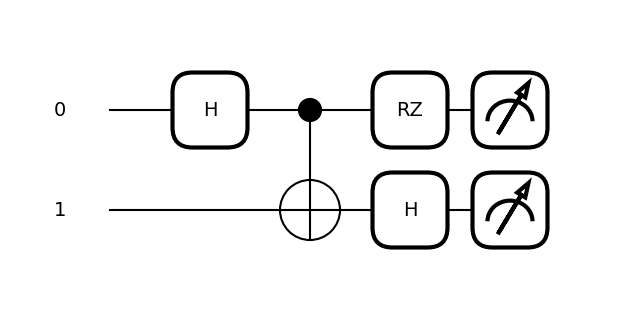

In [5]:
import pennylane as qml # Importing the PennyLane library
import numpy as np  # Importing the NumPy library


theta = [0.5]

def my_first_circuit(theta):


    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RZ(theta, wires=0)
    qml.Hadamard(wires=1)


    return qml.probs(wires = [0,1])

# Check the output of the function for a particular input
dev = qml.device('default.qubit', wires=[0,1])
my = qml.QNode(my_first_circuit, dev)
qml.draw_mpl(my)(theta)


---

### Devices and QNodes


In PennyLane, a quantum function alone isn't enough to run and execute a circuit. For this we need two extra parts:

![QNode.png](attachment:QNode.png)

* a device to run the circuit on
* a QNode, which binds the circuit to the device, and executes it

In this book, our devices will be <b>quantum simulators</b>, but PennyLane provides plugins that enable us to run on real quantum hardware as well! To construct a device in PennyLane, we need to know the name or type of the device, and the number of qubits (wires) it has:

<!-- <div style="text-align: left;">
<img src="fig/device_q.png" alt="Example" style="margin-left: 80px;"width="500"/>
</div> -->

![device_q.png](attachment:device_q.png)

[Click here to know about the devices more and plugins](https://pennylane.ai/plugins/)

#### Example:

dev = qml.device('default.qubit', wires=["wire_a", "wire_b"])

Unless stated otherwise, we will always be using the **default.qubit** device, which is a standard quantum simulator. You can also give string labels to the wires on a device.

Once we have a device, we can construct a [QNode](https://docs.pennylane.ai/en/stable/code/api/pennylane.QNode.html). QNodes are the main unit of quantum computation in PennyLane.

(<Figure size 600x400 with 1 Axes>, <Axes: >)

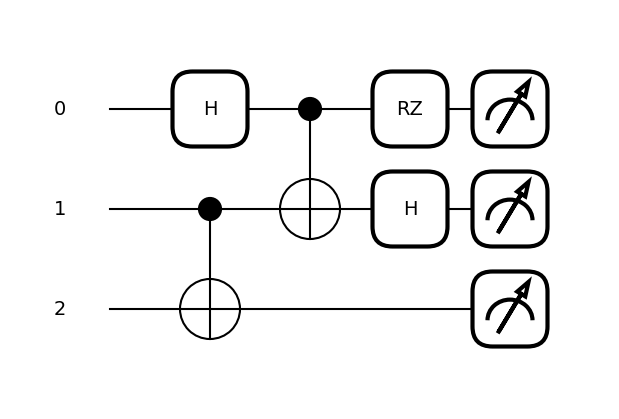

In [ ]:
import pennylane as qml


dev = qml.device('default.qubit', wires = [0,1,2])

theta = [0.54]
def my_first_circuit(theta):
    qml.CNOT(wires = [1,2])
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)
    qml.Hadamard(wires = 1)
    return qml.probs(wires = [0,1,2])

my_first_QNode = qml.QNode(my_first_circuit, dev)

qml.draw_mpl(my_first_QNode)(theta)

### Decorators

Decorators are fucntions which will take fucntions and build on the top of that functions. See the below figure  

![decorator.png](attachment:decorator.png)

It Decorate a quantum function with **@qml.qnode(dev)**, will automatically produce a QNode with the same name as your function that can be run on the device dev. <br>



(<Figure size 600x300 with 1 Axes>, <Axes: >)

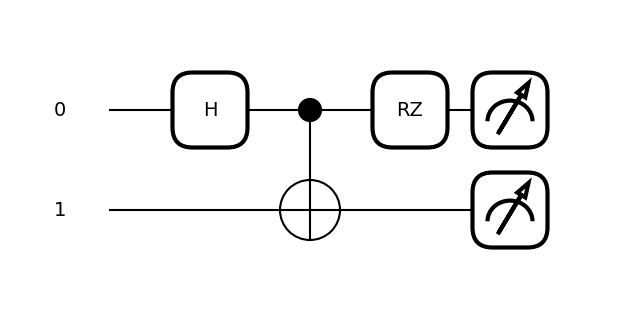

In [ ]:
import pennylane as qml
import numpy as np

dev = qml.device('default.qubit', wires = [0,1])

@qml.qnode(dev)  ## This is how we define the decorator for the QNode

def my_first_circuit1(theta):

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.RZ(theta, wires = 0)

    return qml.probs(wires = [0,1])

theta =[0.2,0.2]
my_first_QNode1 = my_first_circuit1 ## ## No need to write QNode again as we have defined the decorator above
qml.draw_mpl(my_first_QNode1)(theta)

---

### Measurement

Measurement in quantum computing involves observing the state of qubits, collapsing their superposition into definite states. This process is probabilistic, meaning outcomes depend on the qubits' probability amplitudes. Accurate measurement is crucial for extracting meaningful results from quantum computations. <br>

**Quantum Mechanics Posulate:**

Quantum measurements are described by a collection ${M_m}$ of
$measurement \ operators$. These are operators acting on the state space of the
system being measured. The index m refers to the measurement outcomes that
may occur in the experiment. If the state of the quantum system is $|{\psi}\rangle$
immediately before the measurement then the probability that result m occurs is given by

* $p(m) = \langle{\psi}|M^\dagger_mM_m|{\psi}\rangle$  <br>

and the state of the system after the measurement is <br>

* $\dfrac{M_m|{\psi}\rangle}{\sqrt{\langle{\psi}|M^\dagger_mM_m|{\psi}\rangle}}$ <br>

and the measrement operators satify the $completeness \ equation,$ <br>

* $\sum_{m} M_m^\dagger M_m = I$

### Pennylane playground

1: To get the probabilities of each computational basis state, remember $Z$ basis is the computational basis in quantum computing.

[0.5 0.5]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

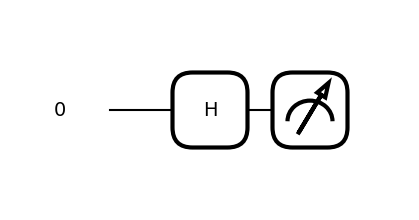

In [ ]:
import pennylane as qml

dev = qml.device("default.qubit", wires=0)
@qml.qnode(dev)

def circuit_Z():
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

# op=qml.Hadamard
print(circuit_Z())

qml.draw_mpl(circuit_Z)()  # As no arugument is there in the circuit_Z function, we can call it with ()

**Example**

Take two measurement operators $M_{1} = |{+}\rangle\langle{+}|$ and $M_{2} = |{-}\rangle \langle{-}|$ such that they will satisfy the completeness equation.<br>
where as $|{+}\rangle = \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $|{-}\rangle = \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix}$. <br>

* $M_1 = \dfrac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} $ and $M_2 = \dfrac{1}{2}\begin{bmatrix} 1 & -1 \\ -1 & 1 \end{bmatrix} $

* Quantum state $|{\psi}\rangle = \dfrac{1}{\sqrt{2}} (|{0}\rangle + |{1}\rangle) $ we want to measure in $X$ basis $(|{+}\rangle, |{-}\rangle)$ means with measurement operators $M_1$ and $M_2$ who's corresponding eigen values will be $+1$ and $-1$. <br>

* $p(+1) =  \langle{\psi}|M^\dagger_1M_1|{\psi}\rangle \\
 \ \ \ \ \ \ \ \ \ \ \ \  = \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \end{bmatrix} \dfrac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & 1  \end{bmatrix} \dfrac{1}{2}\begin{bmatrix} 1 & 1\\ 1 & 1 \end{bmatrix} \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \\
  \ \ \ \ \ \ \ \ \ \ \ \ = \dfrac{1}{2} $  <br>

* State after measurement = $ \dfrac{M_1|{\psi\rangle}}{\sqrt{p(+1)}}$ $\rightarrow \dfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}  = |{+}\rangle $

Similary $p(-1) = \dfrac{1}{2}$ and state after measurement will be $|{-}\rangle$

Now if want to measure in $X$ basis then we can use the below code

[1. 0.]


(<Figure size 400x200 with 1 Axes>, <Axes: >)

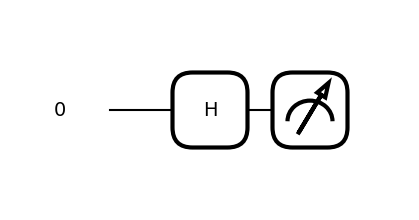

In [ ]:
import pennylane as qml
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit_X():
    qml.Hadamard(wires=0)
    return qml.probs(op=qml.PauliX(wires=0)) #use it to change the basis of the quantum state 6t

# op=qml.Hadamard
print(circuit_X())
qml.draw_mpl(circuit_X)()

#### <b><font color='red'>Exercise 1.5</font></b>:




<div class="blue">

Write an function with the help of pennylane for the below circuit where meaasurement will done in PauliY basis in qubit 1 and X measurement will be done in qubit 2.

![exercise_1.5.png](attachment:exercise_1.5.png)






[👉 👉 Click here for reference ✋](https://docs.pennylane.ai/en/stable/introduction/measurements.html)

In [ ]:
import pennylane as qml
dev = qml.device("default.qubit", wires=[0,1,2])

@qml.qnode(dev)
# U1 = qml.PauliX(0) @ qml.PauliX(1)

# obs = [qml.Hadamard(1) @ qml.Hadamard(2)]
#
def test_circuit(theta1, theta2):

    ## Write for code for the circuit
    ## Applu theta1 on RY(0) and theta2 on RZ(1)

    return              #  Hint:  op = pauli_op1 @ paili_op2 with their corresponding wire

# op=qml.Hadamard
t1 = 0.5
t2 = 0.4


print(test_circuit(t1, t2))
qml.draw_mpl(test_circuit)(t1,t2)

# THANK YOU. Have a nice day.